In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

%matplotlib inline


In [ ]:
# Source of HR - Employee Attrition Data == WATSON Sample Data Sets
# https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

#
# Before we proceed with kNN or any other Classification technique ,we need -Feature Reduction. 
# Reducing the Number of Features or Variables ,which are utilized to Classify -Employees Attrition Risk. 
# Basic feature reductiion techniques :-

# 1- Factor Analysis - Factor Analysis is a generic term used for Analysis of Factors . PCA is best option. 
# 2- Principal Component Analysis - PCA (Done)
#
# Why PCA -Further reading :-
# http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
#
#
# I have undertaken PCA for the IBM WATSON ANALYTICS SAMPLE - Employee Attrition Dataset 
#
# Standardize Variables :- "Democracy amongst Variables" - Ensure All Features have - MEAN = 0 and Variance = 1 
#
# As a further investigation - we need Survival Analysis 
# Survival Analysis predicts - when an employee is most likely to Churn or Exit. 
#

In [ ]:
#Tried PCA --- Now without PCA 
# While doing PCA - do NOT Include RESPONSE Variable - Attrition 
# Do NOT include - Binomial Or Categorical Variables - Categorical can be included with advanced methods 
# Advanced methods listed here- http://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/14013#14013
# Advanced methods out of scope for now . 

In [2]:
# Pre Process- Data 

df=pd.read_csv('hr.tsv',sep='\t')
df.head(5)

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Read TSV with \t 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
mymap = {'Yes':1,'No':0,'Travel_Rarely':1, 'Travel_Frequently': 2 ,'Non-Travel':3, 'Research & Development' :1 , 
         'Human Resources':2,'Sales':3,'Life Sciences':1,'Medical':6,'Technical Degree':3,'Marketing':4,'Other':5,
        'Female':1, 'Male':2,'Research Scientist':1,'Laboratory Technician':2,'Healthcare Representative':3,
         'Manufacturing Director':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Sales Executive':8,
        'Single':1,'Married':2,'Divorced':3}#Medical = 6 as HR =2 in another column

#
dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh.head(5)
#
# In mymap == Yes =1 and No =0 - replacements made in both Attrition and OverTime
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html

#dfh.to_csv('dfh_05DEC.csv') # Ok for down csv 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,3,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,6,1,5,...,4,80,1,6,3,3,2,2,2,2


In [39]:
print dfh.shape

print "________________________________________"

print dfh["Attrition"].value_counts() # Here - 0 == Live Employee , 1 == Exited Employee / Attrited Employee 

names = dfh.columns.values

print "________________________________________"

print names


(2940, 35)
________________________________________
0    2466
1     474
Name: Attrition, dtype: int64
________________________________________
['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [40]:
# Columns - Age =0 , Attrition =1 .....
# Columns - 0,3,5,12,18,19,23,28,31,32,33,34 -retained for PCA,only these Columns or Features have Continous Data - others are Categorical
# Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager

df1 = dfh.drop(df.columns[[8,9,21]],axis=1,inplace=False) #  OK for now 
# 
print df1.shape
print df1.columns.values
print "___####_________________________________________________________________####_______"
print df1.head(5)

#dfpca.describe(include = 'all') # Not required 
#
# http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
# df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index 
# in Pandas axis=1 -- means ------------->>> AXIS along the Rows - WEST to EAST 
# axis=0 --- means ------------->>> AXIS along the Columns - NORTH to SOUTH 
#drop_list = ['Department','Education','EducationField'] # Such a list wont work ??
#
#test_ids = df1.pop("Age")        ### Want Single Column Vector with Feature AGE - use POP on DF 
#print test_ids                     ### OK 

(2940, 32)
['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EnvironmentSatisfaction'
 'Gender' 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobRole'
 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate'
 'NumCompaniesWorked' 'OverTime' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StandardHours' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager']
___####_________________________________________________________________####_______
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               1       1102           3                 1   
1   49          0               2        279           1                 8   
2   37          1               1       1373           1                 2   
3   33          0               2       13

In [41]:
# Convert DF to Numpy Array 
# 1st Numpy Array == X , only features 
# 2nd Numpy Array == y , only target Labels
#

import numpy as np

X = df1.iloc[:,2:32].values # All Features of - df1 besides Attr and AGE #TBD --- Need to ADD AGE ??? 
y = dfh.iloc[:,1].values # Choosing only 1 - Target Feature from - dfh
#
print type(X)
print type(y)
#
print X.shape
print y.shape
#
print X
print "_________________________________________________________"
print('Target Variable "Attrition":', (y))
print "_________________________________________________________"
print('Class labels for Target Variable "Attrition":', np.unique(y))
print "________________"
print('Percentage of Class Label ==1 = {:.4f}'.format(dfh["Attrition"].mean()))
print('Percentage of Class Label ==0 = {:.4f}'.format(1-dfh["Attrition"].mean()))
print "_________________________________________________________"
# 
print "_Any model that Predicts at 83.88% Accuracy is a Non Predictor OR a NO Model- as it always predicts the Dominant Class "
print " which in our case is ZERO or LIVE EMPLOYEE - we need more than 83.88% accuracy score___"

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(2940, 30)
(2940,)
[[   1 1102    3 ...,    4    0    5]
 [   2  279    1 ...,    7    1    7]
 [   1 1373    1 ...,    0    0    0]
 ..., 
 [   1  155    1 ...,    2    0    3]
 [   2 1023    3 ...,    6    0    8]
 [   1  628    1 ...,    3    1    2]]
_________________________________________________________
('Target Variable "Attrition":', array([1, 0, 1, ..., 0, 0, 0]))
_________________________________________________________
('Class labels for Target Variable "Attrition":', array([0, 1]))
________________
Percentage of Class Label ==1 = 0.1612
Percentage of Class Label ==0 = 0.8388
_________________________________________________________
_Any model that Predicts at 83.88% Accuracy is a Non Predictor OR a NO Model- as it always predicts the Dominant Class 
 which in our case is ZERO or LIVE EMPLOYEE - we need more than 83.88% accuracy score___


In [9]:
# Utility === # Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import random
random.seed(123) # if we dont seed - we get different results 

# Splitting data into 70% training and 30% test data:

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#
print X_train.shape
print X_test.shape
print y_train.shape # Pred Variable Only - Attrition--  Train Set 
print y_test.shape  # Pred Variable Only - Attrition--  Test Set 


(2058, 30)
(882, 30)
(2058,)
(882,)


In [42]:
# 06 DEC 

# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [43]:
# train the model using X_train # the MODEL FIT 


%time logreg.fit(X_train, y_train)

print(logreg.intercept_)
print "____________________________"
print(logreg.coef_)


'''
1st Run === Seed=== 123 

CPU times: user 76 ms, sys: 4 ms, total: 80 ms
Wall time: 326 ms
[ 0.0005462]
____________________________
[[  2.03390177e-02  -2.83789590e-04   4.40982987e-01   3.32586817e-02
   -1.50035171e-02  -2.84892487e-02  -3.68481044e-01   2.05502141e-01
   -2.79636060e-03  -4.41114313e-01  -1.84726722e-01  -4.88007777e-02
   -3.67111012e-01  -4.79376685e-01  -5.64266204e-05   1.18016597e-05
    1.35473480e-01   1.48497071e+00  -5.11941990e-02   1.89834986e-01
   -2.02756713e-01   4.36959547e-02  -2.19774636e-01  -6.34101670e-02
   -9.98116795e-02  -1.93761837e-01   1.05970364e-01  -1.31254951e-01
    1.30160915e-01  -1.23466820e-01]]
    

TBD ----- 2nd RUN === NO Seed 



'''

CPU times: user 92 ms, sys: 4 ms, total: 96 ms
Wall time: 236 ms
[ 0.0005462]
____________________________
[[  2.03390177e-02  -2.83789590e-04   4.40982987e-01   3.32586817e-02
   -1.50035171e-02  -2.84892487e-02  -3.68481044e-01   2.05502141e-01
   -2.79636060e-03  -4.41114313e-01  -1.84726722e-01  -4.88007777e-02
   -3.67111012e-01  -4.79376685e-01  -5.64266204e-05   1.18016597e-05
    1.35473480e-01   1.48497071e+00  -5.11941990e-02   1.89834986e-01
   -2.02756713e-01   4.36959547e-02  -2.19774636e-01  -6.34101670e-02
   -9.98116795e-02  -1.93761837e-01   1.05970364e-01  -1.31254951e-01
    1.30160915e-01  -1.23466820e-01]]


'\n1st Run === Seed=== 123 \n\nCPU times: user 76 ms, sys: 4 ms, total: 80 ms\nWall time: 326 ms\n[ 0.0005462]\n____________________________\n[[  2.03390177e-02  -2.83789590e-04   4.40982987e-01   3.32586817e-02\n   -1.50035171e-02  -2.84892487e-02  -3.68481044e-01   2.05502141e-01\n   -2.79636060e-03  -4.41114313e-01  -1.84726722e-01  -4.88007777e-02\n   -3.67111012e-01  -4.79376685e-01  -5.64266204e-05   1.18016597e-05\n    1.35473480e-01   1.48497071e+00  -5.11941990e-02   1.89834986e-01\n   -2.02756713e-01   4.36959547e-02  -2.19774636e-01  -6.34101670e-02\n   -9.98116795e-02  -1.93761837e-01   1.05970364e-01  -1.31254951e-01\n    1.30160915e-01  -1.23466820e-01]]\n    \n\nTBD ----- 2nd RUN === NO Seed \n\n\n\n'

In [44]:
# make class predictions for X_test # the MODEL PRED 

y_pred_class = logreg.predict(X_test)
print type(y_pred_class)


'''
# TBD --- Check 

print y_pred_class.shape
print y_pred_class
print "__________________________________"
print y_test

'''


<type 'numpy.ndarray'>


'\n# TBD --- Check \n\nprint y_pred_class.shape\nprint y_pred_class\nprint "__________________________________"\nprint y_test\n\n'

In [13]:
# calculate predicted probabilities for X_test(well calibrated)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
#y_pred_prob #Ok Dont 

In [45]:
# calculate accuracy MODEL EVAL 
# calculate accuracy of class predictions
from sklearn import metrics

print len(y_pred_class)


print "__________________________________________"
print len(y_test)

print('Logistic Reg Model predicted classes: {}'.format(y_pred_class))
print('Actual data - Real classes: {}'.format(y_test))

print "__________________________________________"

print metrics.accuracy_score(y_test, y_pred_class)

print "_____Model Evaluation with AUC Area Under the Curve __________________"
print metrics.roc_auc_score(y_test, y_pred_class)


########

#metrics

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_class))

'''
##########################
# PCA data set --- Exactly same with multiple runs - seed or no seed -- 

0.834467120181
precision    recall  f1-score   support

          0       0.84      1.00      0.91       737
          1       0.00      0.00      0.00       145       ##### Notice All ZERO's === NO 1's being Predicted ?? 

avg / total       0.70      0.83      0.76       882

##########################
Non PCA Data Set with Seed 123 

#1 _____Model Evaluation
0.878684807256 == 87.86% , Accuracy Score - which is OK not Good as a Non Model is supposed to have - 
As calculated above earlier = 1-dfh["Attrition].mean() == 83.88% 

#2_____Model Evaluation with AUC Area Under the Curve __________________
0.672582229916 = 67.25%

0.878684807256
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       737
          1       0.78      0.37      0.50       145      ##### Notice All Non ZERO's === 

avg / total       0.87      0.88      0.86       882


'''

882
__________________________________________
882
Logistic Reg Model predicted classes: [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 

'\n##########################\n# PCA data set --- Exactly same with multiple runs - seed or no seed -- \n\n0.834467120181\nprecision    recall  f1-score   support\n\n          0       0.84      1.00      0.91       737\n          1       0.00      0.00      0.00       145       ##### Notice All ZERO\'s === No 1\'s being Predicted ?? \n\navg / total       0.70      0.83      0.76       882\n\n##########################\nNon PCA Data Set with Seed 123 \n\n#1 _____Model Evaluation\n0.878684807256 == 87.86% , Accuracy Score - which is OK not Good as a Non Model is supposed to have - \nAs calculated above earlier = 1-dfh["Attrition].mean() == 83.88% \n\n#2_____Model Evaluation with AUC Area Under the Curve __________________\n0.672582229916 = 67.25%\n\n0.878684807256\n             precision    recall  f1-score   support\n\n          0       0.89      0.98      0.93       737\n          1       0.78      0.37      0.50       145      ##### Notice All Non ZERO\'s === \n\navg / total       0.8

In [46]:
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

# Total 882 

'''

         PRED      PRED
    _____0___________1________
ACTUAL | TN   |     FP
  0    |      |
    ________________________
ACTUAL | FN   |     TP
  1    |      |
    ________________________


array([[722== TN,  15 == FP],
       [ 92== FN,  53 == TP]])
       
'''

[[722  15]
 [ 92  53]]


'\n\n         PRED      PRED\n    _____0___________1________\nACTUAL | TN   |     FP\n  0    |      |\n    ________________________\nACTUAL | FN   |     TP\n  1    |      |\n    ________________________\n\n\narray([[722== TN,  15 == FP],\n       [ 92== FN,  53 == TP]])\n       \n'

In [18]:
#print the True positives # Check Term -- "True positives" 

X_test[y_test == y_pred_class]

T_Positives = X_test[y_test == y_pred_class]

print type(T_Positives)

print T_Positives.shape
# (775, 30) == 722 + 53 == Diagonal 1 

print T_Positives

<type 'numpy.ndarray'>
(775, 30)
[[   1  882    3 ...,    9    0    8]
 [   2  667    3 ...,    0    0    0]
 [   1  317    1 ...,    4    0    2]
 ..., 
 [   1  506    1 ...,    2    1    2]
 [   1 1079    3 ...,    2    1    4]
 [   3 1229    3 ...,    7    0    7]]


In [36]:
# print the True Negatives # Check Term -- "T_Negatives" 

X_test[y_test != y_pred_class]

T_Negatives = X_test[y_test != y_pred_class]

print type(T_Negatives)

print T_Negatives.shape

print T_Negatives

# 146 = 145 + 1 --- from the Diagonal of Confusion Matrix seen above 


'''

<type 'numpy.ndarray'>
(146, 12)
[[  31  667    1 ...,    0    0    0]
 [  29  992    1 ...,    2    1    5]
 [  26  342    2 ...,    2    1    2]
 ..., 
 [  34  988   23 ...,    2    0    2]
 [  26 1330   21 ...,    1    0    0]
 [  25  383    9 ...,    2    2    2]]



'''

<type 'numpy.ndarray'>
(146, 12)
[[  31  667    1 ...,    0    0    0]
 [  29  992    1 ...,    2    1    5]
 [  26  342    2 ...,    2    1    2]
 ..., 
 [  34  988   23 ...,    2    0    2]
 [  26 1330   21 ...,    1    0    0]
 [  25  383    9 ...,    2    2    2]]


"\n\n<type 'numpy.ndarray'>\n(146, 12)\n[[  31  667    1 ...,    0    0    0]\n [  29  992    1 ...,    2    1    5]\n [  26  342    2 ...,    2    1    2]\n ..., \n [  34  988   23 ...,    2    0    2]\n [  26 1330   21 ...,    1    0    0]\n [  25  383    9 ...,    2    2    2]]\n\n\n\n"

In [37]:
# print the false positives

X_test[y_test < y_pred_class]

False_Positives = X_test[y_test < y_pred_class]
print type(False_Positives)

print False_Positives.shape

print False_Positives

<type 'numpy.ndarray'>
(1, 12)
[[   32   267    29    49  2837 15919    13     6     6     2     4     1]]


In [38]:
# print the false negatives 

False_Negatives = X_test[y_test > y_pred_class]
print type(False_Negatives)

print False_Negatives.shape

print False_Negatives

<type 'numpy.ndarray'>
(145, 12)
[[  31  667    1 ...,    0    0    0]
 [  29  992    1 ...,    2    1    5]
 [  26  342    2 ...,    2    1    2]
 ..., 
 [  34  988   23 ...,    2    0    2]
 [  26 1330   21 ...,    1    0    0]
 [  25  383    9 ...,    2    2    2]]


In [14]:
type(y_pred_class)

numpy.ndarray

In [15]:
y_pred_class.shape

(882,)

In [42]:
# Correlation from DF Data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

corr_dfpca = dfpca.corr(method='pearson')

#print("--------------- CORRELATIONS ---------------")

#print(corr_dfpca.head(len(dfpca))) # Not required as we are plottng the Correlation 

# We can look at Column 1 of the Print out below - see what all Features have a 
# greater than 0.1 Corr value - Negative or Positive both considered . 

--------------- CREATE A HEATMAP ---------------


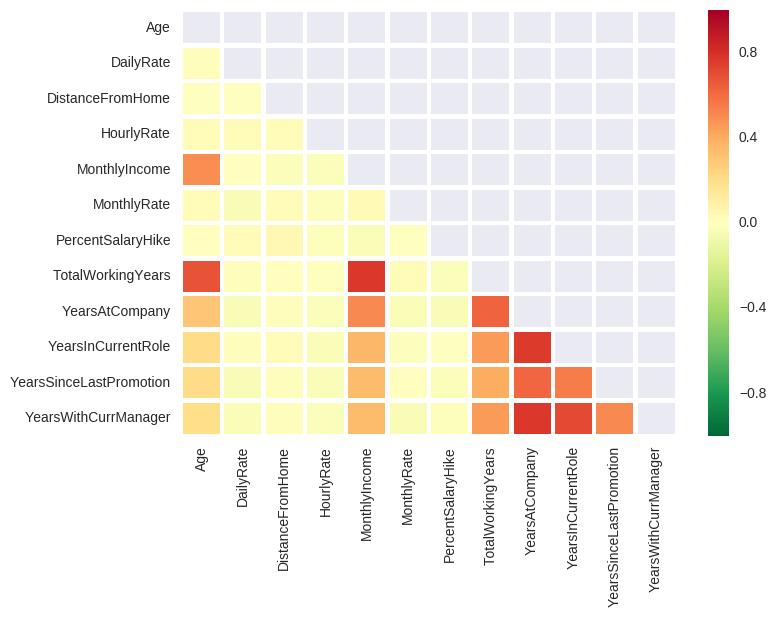

In [43]:
print("--------------- CREATE A HEATMAP ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_dfpca)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_dfpca, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# Watch this space for more 